In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer 
from pymatgen.core.operations import SymmOp 
import matplotlib.pyplot as plt
import matplotlib.image as img
from jupyter_jsmol import JsmolView
from ipywidgets import Layout

In [2]:
# Télécharge la structure du matériau étudié, SrHfN2  mp-9383
with MPRester("dFloIuOFLKpmmcc3") as m:
    s = m.get_structure_by_material_id("mp-9383")

In [3]:
# Analyse de la structure conventionelle standardisée
x = SpacegroupAnalyzer(s)
convss = x.get_conventional_standard_structure()
y = SpacegroupAnalyzer(convss)

In [4]:
# Ecris le fichier cif de la structure conventionnelle
w = CifWriter(convss)
w.write_file('SrHfN2_conventional_standard_download.cif')

In [5]:
# Opérations de symétries
OdS = y.get_symmetry_operations()
print('\033[1m' + "Les différentes opérations de symétries du matériau" + '\033[0;0m')
print('____________________________________________________')
i = 1
for sym in OdS :
    print('')
    print('\033[1m' + "Oprération de symétrie n°",i,":")
    print('\033[0m')
    print(sym)
    i = i+1
    print("----------------------------------")

Les différentes opérations de symétries du matériau
____________________________________________________

Oprération de symétrie n° 1 :

Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 2 :

Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 3 :

Rot:
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 4 :

Rot:
[[ 0.  1.  0.]
 [-1.  1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 5 :

Rot:
[[-1.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 6 :

Rot:
[[ 1. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------

Oprération de symétrie n° 7 :

Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
--------

In [6]:
# Sites des atomes dans la structure symétrisée
coord = convss.sites
print('\033[1m' + "Les coordonnées des atomes dans la maille conventionnelle standardisée" + '\033[0m')
print('_______________________________________________________________________')
print('')
for site in coord:
    print('\033[1m',site.species,":")
    print('\033[0m')
    print('[','%.4f,' % site.a,'%.4f,' % site.b,'%.4f' % site.c,']')
    print('')
    print('-------------------------')

Les coordonnées des atomes dans la maille conventionnelle standardisée
_______________________________________________________________________

 Sr1 :

[ 0.0000, 0.0000, 0.0000 ]

-------------------------
 Sr1 :

[ 0.6667, 0.3333, 0.3333 ]

-------------------------
 Sr1 :

[ 0.3333, 0.6667, 0.6667 ]

-------------------------
 Hf1 :

[ 0.3333, 0.6667, 0.1667 ]

-------------------------
 Hf1 :

[ 1.0000, 1.0000, 0.5000 ]

-------------------------
 Hf1 :

[ 0.6667, 0.3333, 0.8333 ]

-------------------------
 N1 :

[ 0.0000, 0.0000, 0.2326 ]

-------------------------
 N1 :

[ 0.6667, 0.3333, 0.1007 ]

-------------------------
 N1 :

[ 0.6667, 0.3333, 0.5660 ]

-------------------------
 N1 :

[ 0.3333, 0.6667, 0.4340 ]

-------------------------
 N1 :

[ 0.3333, 0.6667, 0.8993 ]

-------------------------
 N1 :

[ 0.0000, 0.0000, 0.7674 ]

-------------------------


Première symétrie : Plan miroir ( -y, -x, z )
_____________________________________________

On applique ici l'opération de symétrie n°8, sur l'atome de Strontium (Sr) situé aux coordonnées [0.6667 0.3333 0.3333].
Cet élément de symétrie est un plan miroir dont la matrice de rotation et le vecteur de translation sont les suivants :
La matrice de rotation : 
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
Le vecteur de translation : 
[0. 0. 0.]

Les coordonnées de l'image sont obtenues en multipliant le vecteur coordonnées de l'atome de Sr par la matrice de rotation.
Et en additionnant ensuite le vecteur de translation au résultat de la première opération (ici il n'a pas d'influence).
L'image de notre atome est donc obtenue par la réflexion sur le plan miroir (1,1,0),
et a pour coordonnées : [-0.3333 -0.6667  0.3333]

On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :


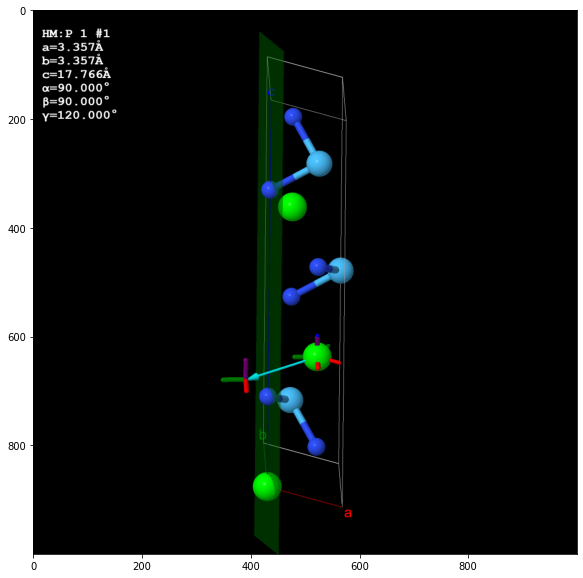

JsmolView(layout=Layout(height='600px'))

In [7]:
# Première opération de symétrie
sym1 = OdS[7]
print('\033[1m' + "Première symétrie : Plan miroir (",sym1.as_xyz_string(),")"+'\033[0m')
print('_____________________________________________')
print('')
print("On applique ici l'opération de symétrie n°8, sur l'atome de Strontium (Sr) situé aux coordonnées [0.6667 0.3333 0.3333].")
print("Cet élément de symétrie est un plan miroir dont la matrice de rotation et le vecteur de translation sont les suivants :")
print('\033[1m'+"La matrice de rotation : "+'\033[0m')
print(sym1.rotation_matrix)
print('\033[1m'+"Le vecteur de translation : "+'\033[0m')
print(sym1.translation_vector)
print('')
print("Les coordonnées de l'image sont obtenues en multipliant le vecteur coordonnées de l'atome de Sr par la matrice de rotation.")
print("Et en additionnant ensuite le vecteur de translation au résultat de la première opération (ici il n'a pas d'influence).")
print("L'image de notre atome est donc obtenue par la réflexion sur le plan miroir (1,1,0),")
print("et a pour coordonnées :",sym1.operate((0.6667, 0.3333, 0.3333)))
print('')
print("On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('view1.jpg'))
plt.show()
view1 = JsmolView(layout=Layout(height="600px"))
display(view1)
view1.load('SrHfN2_conventional_standard_download.cif', '{1 1 1}')
view1.script('draw SYMOP "-y,-x,z" {2/3 1/3 1/3}')

Deuxième symétrie : Translation ( x+2/3, y+1/3, z+1/3 )
_______________________________________________________

On applique ici l'opération de symétrie n°13, sur l'atome de Hafnium (Hf) situé aux coordonnées [0.3333 0.6667 0.1667].
Cet élément de symétrie est une translation dont la matrice de rotation et le vecteur de translation sont les suivants :
La matrice de rotation : 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Le vecteur de translation : 
[0.66666667 0.33333333 0.33333333]

Ici, les coordonnées de l'image sont obtenues en additionnant le vecteur de translation à celui des coordonnées de l'atome Hf.
La matrice de rotation étant unitaire, elle n'a aucune influence (ce qui est logique puisqu'il s'agit d'une translation).
L'image de notre atome est donc obtenue par translation le long de la droite [2/3,1/3,1/3],
et a pour coordonnées :  [0.99996667 1.00003333 0.50003333]

On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :


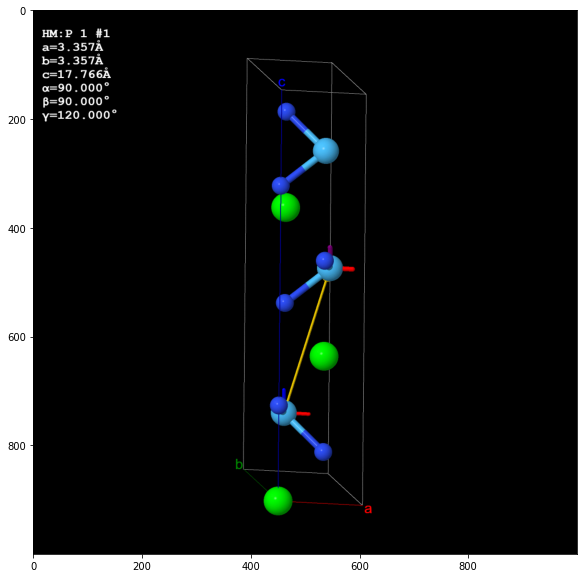

JsmolView(layout=Layout(height='600px'))

In [8]:
# Deuxième opération de symétrie
sym2 = OdS[12]
print('\033[1m' + "Deuxième symétrie : Translation (",sym2.as_xyz_string(),")"+'\033[0m')
print('_______________________________________________________')
print('')
print("On applique ici l'opération de symétrie n°13, sur l'atome de Hafnium (Hf) situé aux coordonnées [0.3333 0.6667 0.1667].")
print("Cet élément de symétrie est une translation dont la matrice de rotation et le vecteur de translation sont les suivants :")
print('\033[1m'+"La matrice de rotation : "+'\033[0m')
print(sym2.rotation_matrix)
print('\033[1m'+"Le vecteur de translation : "+'\033[0m')
print(sym2.translation_vector)
print('')
print("Ici, les coordonnées de l'image sont obtenues en additionnant le vecteur de translation à celui des coordonnées de l'atome Hf.")
print("La matrice de rotation étant unitaire, elle n'a aucune influence (ce qui est logique puisqu'il s'agit d'une translation).")
print("L'image de notre atome est donc obtenue par translation le long de la droite [2/3,1/3,1/3],")
print("et a pour coordonnées : ", sym2.operate((0.3333, 0.6667, 0.1667)))
print('') 
print("On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('view2.jpg'))
plt.show()
view2 = JsmolView(layout=Layout(height="600px"))
display(view2)
view2.load('SrHfN2_conventional_standard_download.cif', '{1 1 1}')
view2.script('draw SYMOP "x+2/3, y+1/3, z+1/3" {1/3 2/3 1/6}')

Troisième symétrie : Rotation d'ordre 3 ( -y, x-y, z )
______________________________________________________

On applique ici l'opération de symétrie n°3, sur l'atome d'Azote (N) situé aux coordonnées [0.6667 0.3333 0.1007].
Cet élément de symétrie est une rotation d'ordre 3 dont la matrice de rotation et le vecteur de translation sont les suivants :
La matrice de rotation : 
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
Le vecteur de translation : 
[0. 0. 0.]

Les coordonnées de l'image sont obtenues en multipliant le vecteur coordonnées de l'atome de Sr par la matrice de rotation.
Et en additionnant ensuite le vecteur de translation au résultat de la première opération (également sans influence).
L'image de notre atome est obtenu par la translation autours de l'axe C de notre maille [0,0,1],
et a pour coordonnées : [-0.3333  0.3334  0.1007]

On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :


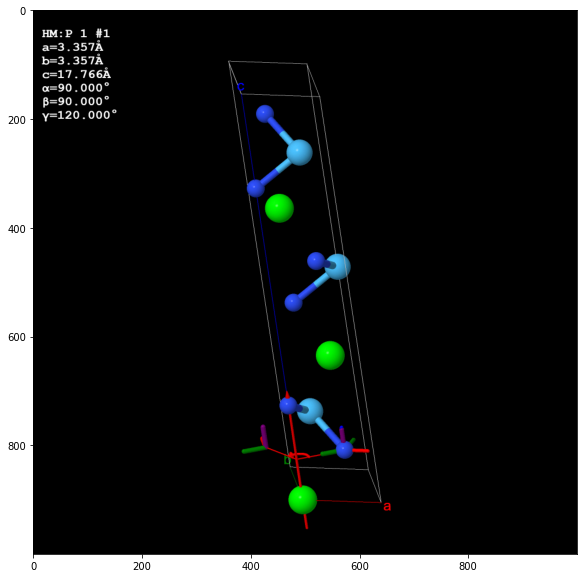

JsmolView(layout=Layout(height='600px'))

In [9]:
# Troisième opération de symétrie
sym3 = OdS[2]
print('\033[1m' + "Troisième symétrie : Rotation d'ordre 3 (",sym3.as_xyz_string(),")"+'\033[0m')
print('______________________________________________________')
print('')
print("On applique ici l'opération de symétrie n°3, sur l'atome d'Azote (N) situé aux coordonnées [0.6667 0.3333 0.1007].")
print("Cet élément de symétrie est une rotation d'ordre 3 dont la matrice de rotation et le vecteur de translation sont les suivants :")
print('\033[1m'+"La matrice de rotation : "+'\033[0m')
print(sym3.rotation_matrix)
print('\033[1m'+"Le vecteur de translation : "+'\033[0m')
print(sym3.translation_vector)
print('')
print("Les coordonnées de l'image sont obtenues en multipliant le vecteur coordonnées de l'atome de Sr par la matrice de rotation.")
print("Et en additionnant ensuite le vecteur de translation au résultat de la première opération (également sans influence).")
print("L'image de notre atome est obtenu par la translation autours de l'axe C de notre maille [0,0,1],")
print("et a pour coordonnées :",sym3.operate((0.6667, 0.3333, 0.1007)))
print('')
print("On peut observer cette transformation sur l'image ci-dessous, obtenue via JsmolView :")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('view3.jpg'))
plt.show()
view3 = JsmolView(layout=Layout(height="600px"))
display(view3)
view3.load('SrHfN2_conventional_standard_download.cif', '{1 1 1}')
view3.script('draw SYMOP "-y,x-y,z" {2/3 1/3 1/10}')

In [10]:
view1.script('write IMAGE 1000 1000 JPG 100 "view1.jpg"')
view2.script('write IMAGE 1000 1000 JPG 100 "view2.jpg"')
view3.script('write IMAGE 1000 1000 JPG 100 "view3.jpg"')